#### Dependencies

In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score, mean_absolute_error

from config.config_file import PATH_CONCRETE_28_DAYS_SCALED

#### Creation of the dataframe for concrete age 28 scaled

In [2]:
df_28_days_scaled = pd.read_csv(PATH_CONCRETE_28_DAYS_SCALED, sep=',', index_col=0)
df_28_days_scaled

,cement_kg,scm1_kg,scm2_kg,water_kg,additive_kg,aggregate_coarse_kg,aggregate_fine_kg,age_days,compressive_strength_mpa
0,2.626147,-0.983607,-0.949284,-1.090769,-0.834540,1.002843,-1.210075,0.0,2.942558
1,2.626147,-0.983607,-0.949284,-1.090769,-0.834540,1.182048,-1.210075,0.0,1.710839
2,1.095739,0.099347,-0.949284,2.327744,-1.298730,-0.287435,-2.332840,0.0,-0.020465
3,0.005324,0.315937,-0.949284,2.327744,-1.298730,-0.287435,-1.292229,0.0,0.619700
4,2.004419,-0.983607,-0.949284,2.327744,-1.298730,-0.287435,-2.332840,0.0,0.172950
...,...,...,...,...,...,...,...,...,...
420,0.104801,0.338737,0.415805,-0.179165,0.353786,-1.026955,0.053720,0.0,0.512858
421,0.542880,-0.983607,0.798271,0.670283,0.632300,-1.650590,0.671240,0.0,-0.379048
422,-1.118569,0.605485,0.692450,0.499358,-0.166107,-0.760537,0.213919,0.0,-0.888252
423,-1.017180,1.144682,-0.949284,-0.386348,0.799408,0.400713,0.335780,0.0,-0.270891


Drop the column "age_days" that is not longer useful

In [3]:
df_28_days_scaled = df_28_days_scaled.drop(labels='age_days', axis=1)
df_28_days_scaled

,cement_kg,scm1_kg,scm2_kg,water_kg,additive_kg,aggregate_coarse_kg,aggregate_fine_kg,compressive_strength_mpa
0,2.626147,-0.983607,-0.949284,-1.090769,-0.834540,1.002843,-1.210075,2.942558
1,2.626147,-0.983607,-0.949284,-1.090769,-0.834540,1.182048,-1.210075,1.710839
2,1.095739,0.099347,-0.949284,2.327744,-1.298730,-0.287435,-2.332840,-0.020465
3,0.005324,0.315937,-0.949284,2.327744,-1.298730,-0.287435,-1.292229,0.619700
4,2.004419,-0.983607,-0.949284,2.327744,-1.298730,-0.287435,-2.332840,0.172950
...,...,...,...,...,...,...,...,...
420,0.104801,0.338737,0.415805,-0.179165,0.353786,-1.026955,0.053720,0.512858
421,0.542880,-0.983607,0.798271,0.670283,0.632300,-1.650590,0.671240,-0.379048
422,-1.118569,0.605485,0.692450,0.499358,-0.166107,-0.760537,0.213919,-0.888252
423,-1.017180,1.144682,-0.949284,-0.386348,0.799408,0.400713,0.335780,-0.270891


#### Separation of the dataframe into training, validation, and test

In [4]:
X = df_28_days_scaled.drop(labels='compressive_strength_mpa', axis=1)
y = df_28_days_scaled['compressive_strength_mpa']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [5]:
print(f"Dimensions of training dataset  (X_train: {X_train.shape}, y_train: {y_train.shape})")
print(f"Dimensions of testing dataset (X_test: {X_test.shape}, y_test: {y_test.shape})")
print(f"Dimensions of validation dataset (X_val: {X_val.shape}, y_val: {y_val.shape})")

Dimensions of training dataset  (X_train: (293, 7), y_train: (293,))
Dimensions of testing dataset (X_test: (63, 7), y_test: (63,))
Dimensions of validation dataset (X_val: (63, 7), y_val: (63,))


#### **Models for regression**

- Random Forest
- SVR
- XGBoost
- Ridge
- Lasso


### Evaluating models' performance using metrics

#### Metrics
- Root Mean Squared Error (RMSE): It is the square root of the Mean Squared Error. RMSE provides an error measure in the same units as the target variable, making it more interpretable than MSE. It penalizes larger errors more strongly due to the squaring step before averaging.

- Mean Squared Error (MSE): It measures the mean squared errors, that is, the average squared difference between the estimated values ​​and the actual values.

- R-squared (R2): Also known as coefficient of determination. It provides a measure of how well predictions fit actual data. It varies between 0 and 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain any variability in the data.

- Mean Absolute Error (MAE): Measures the average of the absolute differences between predictions and actual values.

In [6]:
regression_models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "Ridge Regression": Ridge(random_state=42)
}

In [7]:
for name, regressor in regression_models.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(f"{name} \nRoot Mean Square Error (RMSE): {root_mean_squared_error(y_test, y_pred):.4f} \nMean Square Error (MSE): {mean_squared_error(y_test, y_pred):.4f} \nR-squared (R2): {r2_score(y_test, y_pred):.4f} \nMean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}\n")

RandomForest 
Root Mean Square Error (RMSE): 0.4755 
Mean Square Error (MSE): 0.2261 
R-squared (R2): 0.7898 
Mean Absolute Error (MAE): 0.3236

GradientBoosting 
Root Mean Square Error (RMSE): 0.4510 
Mean Square Error (MSE): 0.2034 
R-squared (R2): 0.8109 
Mean Absolute Error (MAE): 0.3127

XGBoost 
Root Mean Square Error (RMSE): 0.4979 
Mean Square Error (MSE): 0.2479 
R-squared (R2): 0.7695 
Mean Absolute Error (MAE): 0.3347

Ridge Regression 
Root Mean Square Error (RMSE): 0.5392 
Mean Square Error (MSE): 0.2908 
R-squared (R2): 0.7297 
Mean Absolute Error (MAE): 0.4034



Election of best model:<br>
The **GradientBoosting** model shows the best performance across all key metrics, indicating strong predictive power and low error. It captures the variance in the data quite well

#### Hyperparameter Tuning for GradientBoosting

In [8]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

In [9]:
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


#### Evaluation of the best model with the validation data

In [19]:
y_val_pred_best_model = best_model.predict(X_val)

rmse_val_best_model = root_mean_squared_error(y_val, y_val_pred_best_model)
mse_val_best_model = mean_squared_error(y_val, y_val_pred_best_model)
r2_val_best_model = r2_score(y_val, y_val_pred_best_model)
mae_val_best_model = mean_absolute_error(y_val, y_val_pred_best_model)

print(f'Root Mean Squared Error: {rmse_val_best_model:.4f}')
print(f'Mean Squared Error (MSE): {mse_val_best_model:.4f}')
print(f'R^2 Score: {r2_val_best_model:.4f}')
print(f'Mean Absolute Error (MAE): {mae_val_best_model:.4f}')

Root Mean Squared Error: 0.4053
Mean Squared Error (MSE): 0.1642
R^2 Score: 0.8734
Mean Absolute Error (MAE): 0.2707


#### Evaluation of the best model with the testing data

In [20]:
y_test_pred_best_model = best_model.predict(X_test)

rmse_test_best_model = root_mean_squared_error(y_test, y_test_pred_best_model)
mse_test_best_model = mean_squared_error(y_test, y_test_pred_best_model)
r2_test_best_model = r2_score(y_test, y_test_pred_best_model)
mae_test_best_model = mean_absolute_error(y_test, y_test_pred_best_model)

print(f'Root Mean Squared Error: {rmse_test_best_model:.4f}')
print(f'Mean Squared Error (MSE): {mse_test_best_model:.4f}')
print(f'R^2 Score: {r2_test_best_model:.4f}')
print(f'Mean Absolute Error (MAE): {mae_test_best_model:.4f}')

Root Mean Squared Error: 0.4671
Mean Squared Error (MSE): 0.2181
R^2 Score: 0.7972
Mean Absolute Error (MAE): 0.3258


#### Scatter plot of actual vs. predicted values

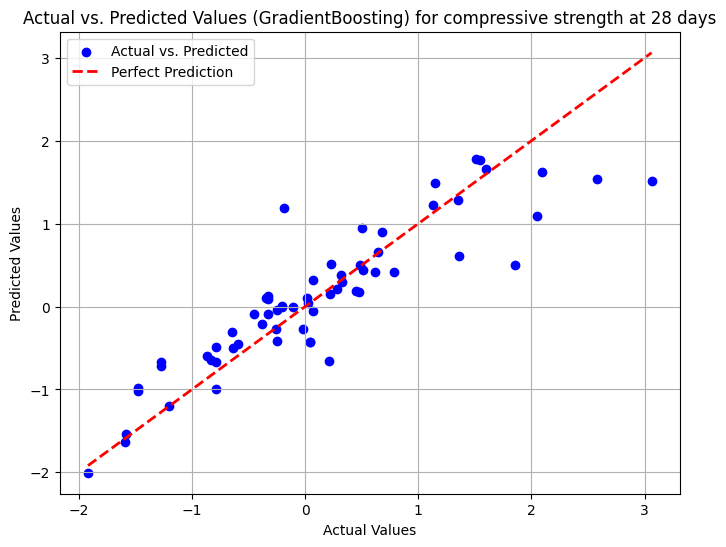

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_best_model, color='blue', marker='o', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (GradientBoosting) for compressive strength at 28 days')
plt.legend()
plt.grid(True)
plt.show()